# Importing the Dependencies

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection and Analysis
url = https://www.kaggle.com/datasets/mirichoi0218/insurance




In [66]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('Dataset/insurance.csv')
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [68]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
categorical_cols = insurance_dataset.select_dtypes(include = ['object']).columns
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [70]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [71]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


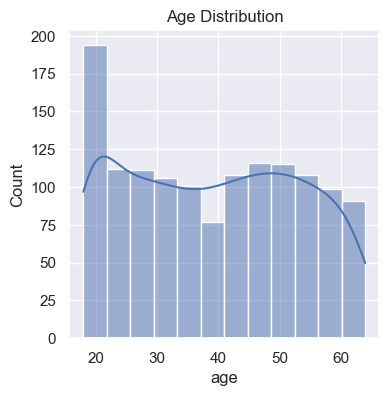

In [72]:
plt.figure(figsize=(4, 4))
sns.histplot(insurance_dataset['age'], kde=True)
plt.title('Age Distribution')
plt.show()

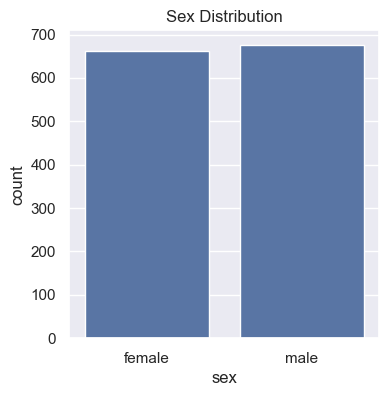

In [73]:
# Gender column
plt.figure(figsize=(4,4))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [74]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

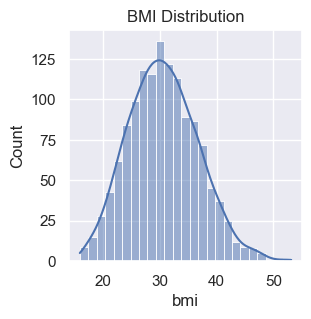

In [75]:
# bmi distribution
plt.figure(figsize=(3, 3))
#sns.displot(insurance_dataset['bmi'])
sns.histplot(insurance_dataset['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

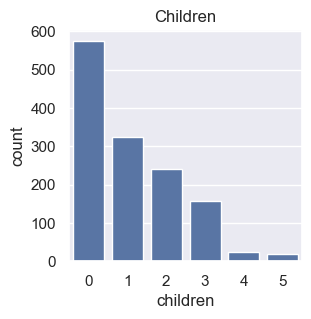

In [76]:
# children column
plt.figure(figsize=(3,3))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [77]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

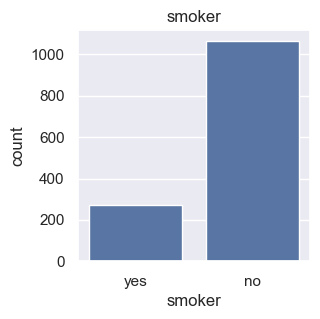

In [78]:
# smoker column
plt.figure(figsize=(3,3))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [79]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

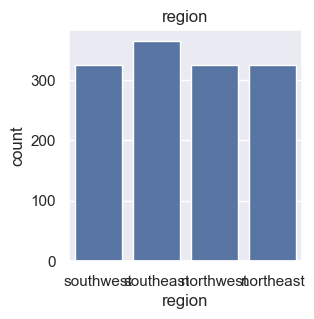

In [80]:
# region column
plt.figure(figsize=(3,3))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [81]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

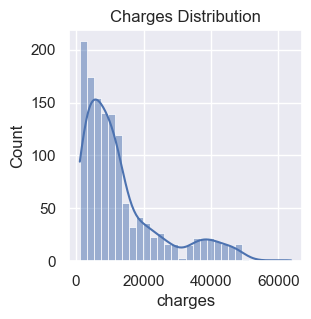

In [82]:
# distribution of charges value
plt.figure(figsize=(3,3))
sns.histplot(insurance_dataset['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()

# Data Pre-Processing

In [83]:
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [84]:
# insurance_dataset_encoded = pd.get_dummies(insurance_dataset, columns=categorical_cols)
# insurance_dataset_encoded.head()

In [ ]:
# Encoding the categorical features
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

# Splitting the Features and Target

In [86]:
X = insurance_dataset.drop(columns='charges', axis = 1)
Y = insurance_dataset['charges']

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training and Model Evaluation

In [88]:
# loading the Linear Regression model
regressor = LinearRegression()

In [90]:
# training on training data
regressor.fit(X_train, Y_train)
# prediction on training data
y_pred_training = regressor.predict(X_train)
r2_training_data = metrics.r2_score(y_pred_training, Y_train)
print(f'R squred valu: {r2_training_data}')


R squred valu: 0.6693380032904603


In [91]:
# training on testing data
regressor.fit(X_train, Y_train)
# prediction on testing data
y_pred_testing = regressor.predict(X_test)
r2_testing_data = metrics.r2_score(y_pred_testing, Y_test)
print(f'R squred valu: {r2_testing_data}')

R squred valu: 0.660665998605892
